In [2]:
#import libraries
# EDA
import pandas as pd
import numpy as np

# Data Preprocessing
from sklearn import preprocessing

# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Recommender System Imps
# Content Based Filtering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
# Collaborative Based Filtering
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

# To work with text data
import re
import string

# **Importing Data**

In [3]:
df = pd.read_csv('/content/dataset.csv')
df.head()

,Food_ID,Name,C_Type,Veg_Non,Describe
0,1,summer squash salad,Healthy Food,veg,"white balsamic vinegar, lemon juice, lemon rin..."
1,2,chicken minced salad,Healthy Food,non-veg,"olive oil, chicken mince, garlic (minced), oni..."
2,3,sweet chilli almonds,Snack,veg,"almonds whole, egg white, curry leaves, salt, ..."
3,4,tricolour salad,Healthy Food,veg,"vinegar, honey/sugar, soy sauce, salt, garlic ..."
4,5,christmas cake,Dessert,veg,"christmas dry fruits (pre-soaked), orange zest..."


In [4]:
# No of dishes in my dataset
len(list(df['Name'].unique()))

400

In [5]:
df['C_Type'].unique() # Categorical Data

array(['Healthy Food', 'Snack', 'Dessert', 'Japanese', 'Indian', 'French',
       'Mexican', 'Italian', 'Chinese', 'Beverage', 'Thai', 'Korean',
       ' Korean', 'Vietnames', 'Nepalese', 'Spanish'], dtype=object)

In [6]:
df['Veg_Non'].unique() # Categorical Data

array(['veg', 'non-veg'], dtype=object)

In [7]:
df.shape

(400, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Food_ID   400 non-null    int64 
 1   Name      400 non-null    object
 2   C_Type    400 non-null    object
 3   Veg_Non   400 non-null    object
 4   Describe  400 non-null    object
dtypes: int64(1), object(4)
memory usage: 15.8+ KB


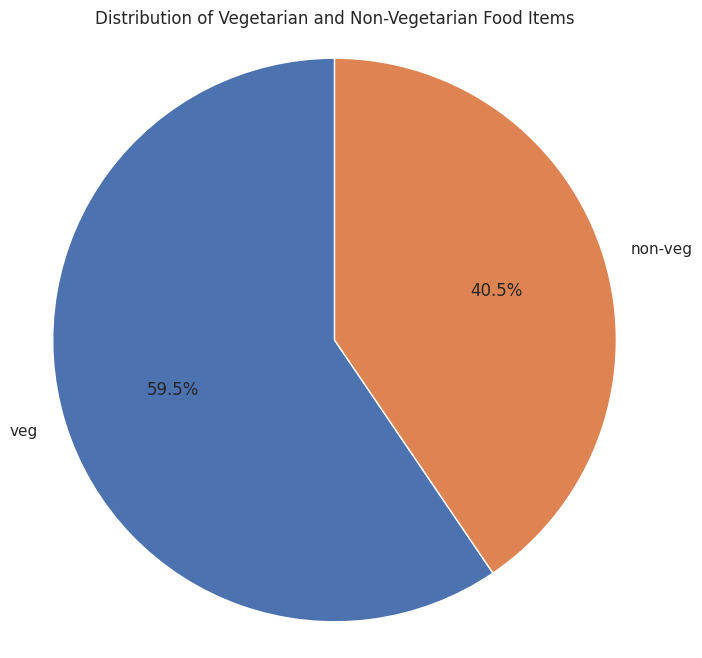

In [9]:
# Count the occurrences of each category in the 'Veg_Non' column
veg_non_counts = df['Veg_Non'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(veg_non_counts, labels=veg_non_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Vegetarian and Non-Vegetarian Food Items')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

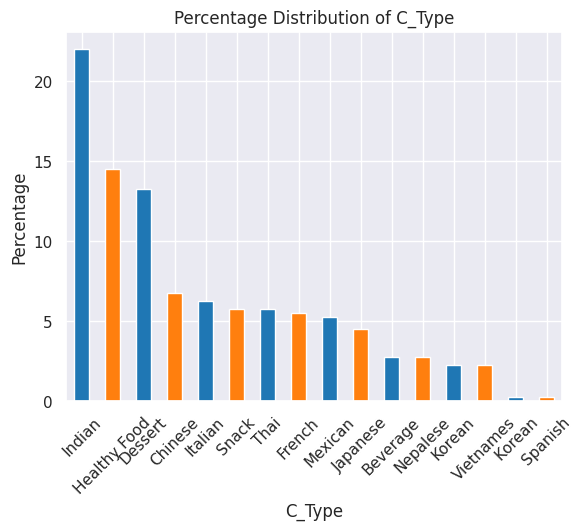

In [10]:
# Count occurrences of each C_Type
c_type_counts = df['C_Type'].value_counts(normalize=True) * 100

# Plot bar chart
c_type_counts.plot.bar(color=['#1f77b4', '#ff7f0e'])
plt.title('Percentage Distribution of C_Type')
plt.xlabel('C_Type')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

In [11]:
# Let's make a function to remove all the punctuation from the "Describe" column
def text_cleaning(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    return text

In [12]:
# Let's clean the text
df['Describe'] = df['Describe'].apply(text_cleaning)

In [13]:
# Let's see if that worked...
df.head()

,Food_ID,Name,C_Type,Veg_Non,Describe
0,1,summer squash salad,Healthy Food,veg,white balsamic vinegar lemon juice lemon rind ...
1,2,chicken minced salad,Healthy Food,non-veg,olive oil chicken mince garlic minced onion sa...
2,3,sweet chilli almonds,Snack,veg,almonds whole egg white curry leaves salt suga...
3,4,tricolour salad,Healthy Food,veg,vinegar honeysugar soy sauce salt garlic clove...
4,5,christmas cake,Dessert,veg,christmas dry fruits presoaked orange zest lem...


In [14]:
# See the duplicate data
df.duplicated().sum()

0

In [15]:
# See the Null values
df.isnull().sum()

,0
Food_ID,0
Name,0
C_Type,0
Veg_Non,0
Describe,0


In [16]:
# General Description
df.describe()

,Food_ID
count,400.000000
mean,200.500000
std,115.614301
min,1.000000
25%,100.750000
50%,200.500000
75%,300.250000
max,400.000000


# **Content Based Filtering**

**Simple Content Based Filtering**

**What is TF-IDF?**

In a large text corpus, some words will be very present (e.g. “the”, “a”, “is” in English) hence carrying very little meaningful information about the actual contents of the document. If we were to feed the direct count data directly to a classifier those very frequent terms would shadow the frequencies of rarer yet more interesting terms.

In order to re-weight the count features into floating point values suitable for usage by a classifier it is very common to use the tf–idf transform.

In [17]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['Describe'])
tfidf_matrix.shape

(400, 1261)

**What is Linear Kernel ?**

The function linear_kernel computes the linear kernel, that is, a special case of polynomial_kernel with degree=1 and coef0=0 (homogeneous).

In [18]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1.        , 0.16228366, 0.13001124, ..., 0.1286286 , 0.04277223,
        0.09993639],
       [0.16228366, 1.        , 0.06799336, ..., 0.14878001, 0.05688681,
        0.16917639],
       [0.13001124, 0.06799336, 1.        , ..., 0.03291577, 0.11795401,
        0.01834168],
       ...,
       [0.1286286 , 0.14878001, 0.03291577, ..., 1.        , 0.        ,
        0.10087579],
       [0.04277223, 0.05688681, 0.11795401, ..., 0.        , 1.        ,
        0.        ],
       [0.09993639, 0.16917639, 0.01834168, ..., 0.10087579, 0.        ,
        1.        ]])

In [19]:
# Just considering the Food names from the dataframe
indices = pd.Series(df.index, index=df['Name']).drop_duplicates()
indices

,0
Name,
summer squash salad,0
chicken minced salad,1
sweet chilli almonds,2
tricolour salad,3
christmas cake,4
...,...
Kimchi Toast,395
"Tacos de Gobernador (Shrimp, Poblano, and Cheese Tacos)",396
Melted Broccoli Pasta With Capers and Anchovies,397


In [20]:
# The main recommender code!
def get_recommendations(title, cosine_sim=cosine_sim):

    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 5 most similar food
    sim_scores = sim_scores[1:6]

    food_indices = [i[0] for i in sim_scores]
    return df['Name'].iloc[food_indices]

# **Advanced Content Based Filtering**

In [21]:
# Including all features that will help in recommending better
features = ['C_Type','Veg_Non', 'Describe']

In [22]:
# Soup represents a mixture of elements
# Similarly, I am making one column that will have all the important features
# I am simply concatenating the strings

def create_soup(x):
    return x['C_Type'] + " " + x['Veg_Non'] + " " + x['Describe']

In [23]:
# Using the soup(), I am creating the column for the dataframe df
df['soup'] = df.apply(create_soup, axis=1)

In [24]:
# Checking out if that worked!
df.head()

,Food_ID,Name,C_Type,Veg_Non,Describe,soup
0,1,summer squash salad,Healthy Food,veg,white balsamic vinegar lemon juice lemon rind ...,Healthy Food veg white balsamic vinegar lemon ...
1,2,chicken minced salad,Healthy Food,non-veg,olive oil chicken mince garlic minced onion sa...,Healthy Food non-veg olive oil chicken mince g...
2,3,sweet chilli almonds,Snack,veg,almonds whole egg white curry leaves salt suga...,Snack veg almonds whole egg white curry leaves...
3,4,tricolour salad,Healthy Food,veg,vinegar honeysugar soy sauce salt garlic clove...,Healthy Food veg vinegar honeysugar soy sauce ...
4,5,christmas cake,Dessert,veg,christmas dry fruits presoaked orange zest lem...,Dessert veg christmas dry fruits presoaked ora...


**What is Count Vectorizer ?**

Convert a collection of text documents to a matrix of token counts. This implementation produces a sparse representation of the counts using scipy.sparse.csr_matrix.

**What is fit_transform ?**

Learn the vocabulary dictionary and return document-term matrix.

In [25]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df['soup'])

**What is Cosine Similarity?**

The function computes cosine similarity between samples in X and Y.

cosine_similarity computes the L2-normalized dot product of vectors. This is called cosine similarity, because Euclidean (L2) normalization projects the vectors onto the unit sphere, and their dot product is then the cosine of the angle between the points denoted by the vectors.

In [26]:
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [27]:
# Reseting the index and pulling out the names of the food alone from the df dataframe
df = df.reset_index()
indices = pd.Series(df.index, index=df['Name'])

In [28]:
# Let's see the names of the food pulled out
display(indices)

,0
Name,
summer squash salad,0
chicken minced salad,1
sweet chilli almonds,2
tricolour salad,3
christmas cake,4
...,...
Kimchi Toast,395
"Tacos de Gobernador (Shrimp, Poblano, and Cheese Tacos)",396
Melted Broccoli Pasta With Capers and Anchovies,397


# **Testing Content Based Filtering**

In [29]:
# This is the first model - simple variation
get_recommendations('tricolour salad')

,Name
103,chilli chicken
1,chicken minced salad
27,vegetable som tam salad
282,veg hakka noodles
166,veg fried rice


In [30]:
# This is the second model - advanced variation
get_recommendations('tricolour salad', cosine_sim2)

,Name
1,chicken minced salad
103,chilli chicken
27,vegetable som tam salad
177,oats shallots pulao
69,shepherds salad (tamatar-kheera salaad)


In [31]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

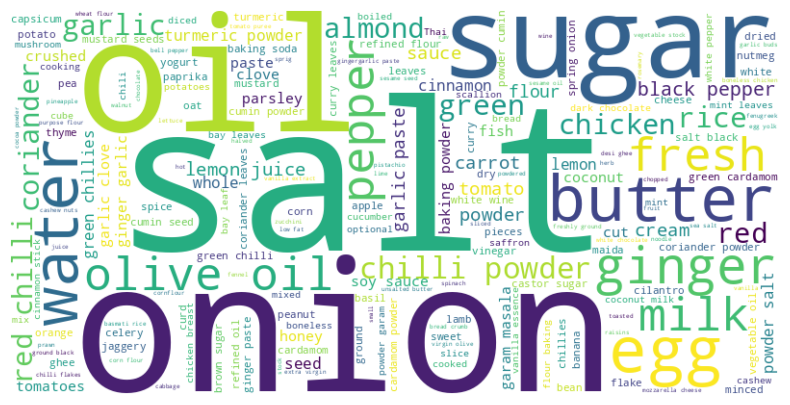

In [32]:
# Create DataFrame
df = pd.DataFrame(df)

# Combine all descriptions into a single string
text = " ".join(description for description in df.Describe)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# **Collaborative Filtering**

In [33]:
# Importing the ratings file
rating = pd.read_csv('/content/ratings.csv')
rating.head()

,User_ID,Food_ID,Rating
0,1.0,88.0,4.0
1,1.0,46.0,3.0
2,1.0,24.0,5.0
3,1.0,25.0,4.0
4,2.0,49.0,1.0


<Axes: xlabel='Rating'>

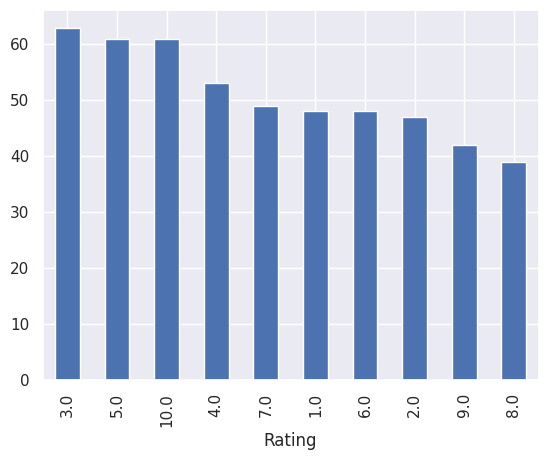

In [34]:
rating.Rating.value_counts().plot(kind='bar')

<Axes: >

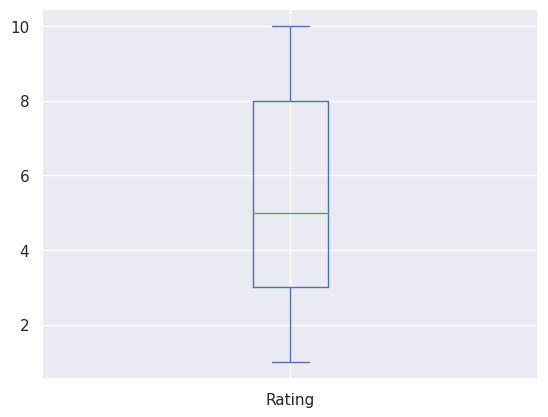

In [35]:
rating.Rating.plot(kind='box')

In [36]:
#Checking the shape
rating.shape

(512, 3)

In [37]:
# Checking for null values
rating.isnull().sum()

,0
User_ID,1
Food_ID,1
Rating,1


In [38]:
# I actually saw the data earlier and found that the last row had no values
# Let's see
rating.tail()

,User_ID,Food_ID,Rating
507,99.0,22.0,1.0
508,100.0,24.0,10.0
509,100.0,233.0,10.0
510,100.0,29.0,7.0
511,NaN,NaN,NaN


from matplotlib import pyplot as plt
_df_0['User_ID'].plot(kind='hist', bins=20, title='User_ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Food_ID'].plot(kind='hist', bins=20, title='Food_ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Rating'].plot(kind='hist', bins=20, title='Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='User_ID', y='Food_ID', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Food_ID', y='Rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['User_ID'].plot(kind='line', figsize=(8, 4), title='User_ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Food_ID'].plot(kind='line', figsize=(8, 4), title='Food_ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Rating'].plot(kind='line', figsize=(8, 4), title='Rating')
plt.gca().spines[['top', 'right']].set_visible(False)

In [39]:
# Removing the last row
rating = rating[:511]
rating.tail()

,User_ID,Food_ID,Rating
506,99.0,65.0,7.0
507,99.0,22.0,1.0
508,100.0,24.0,10.0
509,100.0,233.0,10.0
510,100.0,29.0,7.0


In [40]:
# So, now there should not be any null value
rating.isnull().sum()

,0
User_ID,0
Food_ID,0
Rating,0


In [41]:
# Making a dataframe that has food ID and the number of ratings
food_rating = rating.groupby(by = 'Food_ID').count()
food_rating = food_rating['Rating'].reset_index().rename(columns={'Rating':'Rating_count'})
food_rating

,Food_ID,Rating_count
0,1.0,2
1,2.0,3
2,3.0,2
3,4.0,2
4,5.0,6
...,...,...
304,305.0,1
305,306.0,1
306,307.0,1
307,308.0,1


In [42]:
# Food rating dataframe description
food_rating['Rating_count'].describe()

,Rating_count
count,309.000000
mean,1.653722
std,1.107748
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,7.000000


In [43]:
# The user rating dataframe shows the number of ratings given with respect to the user
user_rating = rating.groupby(by='User_ID').count()
user_rating = user_rating['Rating'].reset_index().rename(columns={'Rating':'Rating_count'})
user_rating

,User_ID,Rating_count
0,1.0,4
1,2.0,4
2,3.0,9
3,4.0,6
4,5.0,6
...,...,...
95,96.0,6
96,97.0,7
97,98.0,7
98,99.0,6


In [44]:
# User rating dataframe description
user_rating["Rating_count"].describe()

,Rating_count
count,100.000000
mean,5.110000
std,2.352282
min,1.000000
25%,3.000000
50%,5.000000
75%,7.000000
max,11.000000


In [45]:
# Ultimate Table
rating_matrix = rating.pivot_table(index='Food_ID',columns='User_ID',values='Rating').fillna(0)
rating_matrix.head()

User_ID,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0
Food_ID,,,,,,,,,,,,,,,,,,,,,
1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,7.0,0.0,0.0


In [46]:
# Shape of rating_matrix
rating_matrix.shape

(309, 100)

**Pivot Table**

In [47]:
user_item_matrix = rating.pivot_table(index='User_ID', columns='Food_ID', values='Rating').fillna(0)
user_item_matrix

Food_ID,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,300.0,301.0,302.0,303.0,304.0,305.0,306.0,307.0,308.0,309.0
User_ID,,,,,,,,,,,,,,,,,,,,,
1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
98.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Use The cosine similarity**

In [48]:
from sklearn.metrics.pairwise import cosine_similarity

item_similarity = cosine_similarity(user_item_matrix.T)
item_similarity_df = pd.DataFrame(item_similarity, index=user_item_matrix.columns, columns=user_item_matrix.columns)
item_similarity_df

Food_ID,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,300.0,301.0,302.0,303.0,304.0,305.0,306.0,307.0,308.0,309.0
Food_ID,,,,,,,,,,,,,,,,,,,,,
1.0,1.000000,0.000000,0.0,0.0,0.000000,0.204006,0.452548,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.894427,0.0,0.0
2.0,0.000000,1.000000,0.0,0.0,0.489855,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3.0,0.000000,0.000000,1.0,0.0,0.000000,0.064512,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4.0,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
5.0,0.000000,0.489855,0.0,0.0,1.000000,0.000000,0.000000,0.0,0.0,0.108806,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0
306.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0
307.0,0.894427,0.000000,0.0,0.0,0.000000,0.000000,0.505964,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0


In [49]:
def recommend_items(user_id, user_item_matrix, item_similarity_df, n_recommendations=5):
    # Get the ratings given by the user
    user_ratings = user_item_matrix.loc[user_id]
    user_unrated_items = user_ratings[user_ratings == 0].index.tolist()

    # Predict ratings for the items not rated by the user
    item_scores = {}
    for item in user_unrated_items:
        similar_items = item_similarity_df[item]
        user_scores = user_ratings[user_ratings > 0]
        item_scores[item] = sum(user_scores * similar_items[user_scores.index]) / (sum(similar_items[user_scores.index]) + 1e-9)

    # Sort the predicted ratings and return the top N recommendations
    recommended_items = sorted(item_scores.items(), key=lambda x: x[1], reverse=True)[:n_recommendations]
    return [item for item, score in recommended_items]

# Example: Recommend 5 items for user with ID 49
recommended_food_ids = recommend_items(user_id=49, user_item_matrix=user_item_matrix, item_similarity_df=item_similarity_df, n_recommendations=5)
print(f"Recommended Food IDs for User 49: {recommended_food_ids}")

Recommended Food IDs for User 49: [99.0, 145.0, 239.0, 43.0, 270.0]


**Now Using Matrix Factorization**

In [50]:
user_item_matrix

Food_ID,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,300.0,301.0,302.0,303.0,304.0,305.0,306.0,307.0,308.0,309.0
User_ID,,,,,,,,,,,,,,,,,,,,,
1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
98.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
from scipy.sparse.linalg import svds
from scipy.sparse import csr_matrix

In [52]:
user_item_matrix_csr = csr_matrix(user_item_matrix.values)
print(user_item_matrix_csr)

  (0, 23)	5.0
  (0, 24)	4.0
  (0, 45)	3.0
  (0, 87)	4.0
  (1, 32)	8.0
  (1, 48)	1.0
  (1, 70)	8.0
  (1, 105)	9.0
  (2, 45)	2.0
  (2, 64)	3.0
  (2, 72)	9.0
  (2, 109)	10.0
  (2, 167)	1.0
  (2, 200)	8.0
  (2, 208)	6.0
  (2, 291)	8.0
  (2, 298)	1.0
  (3, 13)	5.0
  (3, 20)	1.0
  (3, 127)	6.0
  (3, 140)	5.0
  (3, 169)	1.0
  (3, 211)	10.0
  (4, 7)	6.0
  (4, 26)	6.0
  :	:
  (95, 270)	7.0
  (95, 292)	5.0
  (96, 19)	1.0
  (96, 30)	3.0
  (96, 45)	7.0
  (96, 63)	4.0
  (96, 143)	6.0
  (96, 214)	9.0
  (96, 307)	3.0
  (97, 4)	7.0
  (97, 34)	4.0
  (97, 39)	10.0
  (97, 46)	2.0
  (97, 81)	2.0
  (97, 193)	2.0
  (97, 216)	3.0
  (98, 21)	1.0
  (98, 48)	3.0
  (98, 64)	7.0
  (98, 68)	8.0
  (98, 92)	7.0
  (98, 151)	2.0
  (99, 23)	10.0
  (99, 28)	7.0
  (99, 232)	10.0


In [53]:
user_item_matrix_csr.shape

(100, 309)

In [54]:
u ,sigma ,vt = svds(user_item_matrix_csr ,k=99)

In [55]:
sigma_diag = np.diag(sigma)
sigma_diag

array([[ 2.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  3.30230592,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  4.12103474, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 23.94359213,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        24.31018547,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , 25.15399114]])

In [56]:
predicted_rating = np.dot(np.dot(u,sigma_diag) ,vt)
predicted_rating.shape

(100, 309)

In [57]:
predicted_rating_df = pd.DataFrame(predicted_rating ,index = user_item_matrix.index ,columns = user_item_matrix.columns)
predicted_rating_df

Food_ID,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,300.0,301.0,302.0,303.0,304.0,305.0,306.0,307.0,308.0,309.0
User_ID,,,,,,,,,,,,,,,,,,,,,
1.0,-2.714115e-05,-0.000090,1.071136e-06,0.000112,4.639872e-06,-4.202131e-05,3.654217e-05,-2.186459e-05,-0.000245,1.122199e-05,...,-1.178005e-06,1.165899e-05,1.541941e-05,0.000095,3.920555e-05,-7.398617e-17,1.840905e-05,-3.776072e-06,0.000715,-1.894320e-05
2.0,-5.632065e-07,-0.000002,2.222716e-08,0.000002,9.628207e-08,-8.719849e-07,7.582872e-07,-4.537125e-07,-0.000005,2.328676e-07,...,-2.444479e-08,2.419358e-07,3.199685e-07,0.000002,8.135549e-07,2.443943e-15,3.820066e-07,-7.835732e-08,0.000015,-3.930907e-07
3.0,-6.614629e-06,-0.000022,2.610488e-07,0.000027,1.130793e-06,-1.024111e-05,8.905773e-06,-5.328667e-06,-0.000060,2.734935e-06,...,-2.870941e-07,2.841437e-06,3.757899e-06,0.000023,9.554869e-06,-3.345204e-15,4.486511e-06,-9.202746e-07,0.000174,-4.616689e-06
4.0,-2.332433e-06,-0.000008,9.205036e-08,0.000010,3.987374e-07,-3.611192e-06,3.140330e-06,-1.878981e-06,-0.000021,9.643855e-07,...,-1.012344e-07,1.001940e-06,1.325100e-06,0.000008,3.369213e-06,4.966768e-15,1.582022e-06,-3.245048e-07,0.000061,-1.627925e-06
5.0,-7.213173e-06,-0.000024,2.846706e-07,0.000030,1.233117e-06,-1.116780e-05,9.711637e-06,5.999994e+00,-0.000065,2.982413e-06,...,-3.130726e-07,3.098552e-06,4.097944e-06,0.000025,1.041947e-05,8.935810e-16,4.892486e-06,-1.003548e-06,0.000190,-5.034444e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96.0,-1.072618e-04,-0.000357,4.233127e-06,0.000441,1.833677e-05,-1.660682e-04,1.444146e-04,-8.640884e-05,-0.000969,4.434928e-05,...,-4.655473e-06,4.607629e-05,6.093751e-05,0.000375,1.549403e-04,6.089588e-16,7.275256e-05,-1.492303e-05,0.002824,-7.486351e-05
97.0,3.292921e-04,0.001097,-1.299564e-05,-0.001355,-5.629360e-05,5.098268e-04,-4.433507e-04,2.652738e-04,0.002975,-1.361516e-04,...,1.429223e-05,-1.414535e-04,-1.870772e-04,-0.001153,-4.756643e-04,2.208893e-15,-2.233492e-04,4.581348e-05,2.991331,2.298298e-04
98.0,-3.216359e-07,-0.000001,1.269348e-08,0.000001,7.000000e+00,-4.979731e-07,4.330426e-07,-2.591061e-07,-0.000003,1.329860e-07,...,-1.395993e-08,1.381647e-07,1.827276e-07,0.000001,4.646049e-07,1.797535e-15,2.181563e-07,-4.474830e-08,0.000008,-2.244862e-07


In [58]:
def recommend(userid ,predicted_rating_df = predicted_rating_df ,n =5):
    user_items = predicted_rating_df.iloc[userid,:]
    r = user_items.nlargest(n).index
    r = sorted(r)
    print(r)
    return r

first predict :Recommended Food IDs for User 49: [99, 145, 239, 43, 270]

In [59]:
r = recommend(userid = 49)

[19.0, 57.0, 81.0, 158.0, 225.0]


the food recommended with the second

In [60]:
df[df['Food_ID'].isin(r)]

,index,Food_ID,Name,C_Type,Veg_Non,Describe,soup
18,18,19,baked shankarpali,Snack,veg,whole wheat flour atta refined flour maida gar...,Snack veg whole wheat flour atta refined flour...
56,56,57,fish with jamun sauce,Indian,non-veg,jamun sugar chilli garlic cloves minced cumin ...,Indian non-veg jamun sugar chilli garlic clove...
80,80,81,fruit infused tea,Beverage,veg,chamomile tea bags orange berries blueberries ...,Beverage veg chamomile tea bags orange berries...
157,157,158,fish moilee,Indian,non-veg,Basa fish onion ginger garlic buds green chill...,Indian non-veg Basa fish onion ginger garlic b...
224,224,225,sweet potato pie,Dessert,veg,yams red skinned condensed milk sugar egg cin...,Dessert veg yams red skinned condensed milk su...


the food recommended with the 1st

In [61]:
df[df['Food_ID'].isin(recommended_food_ids)]

,index,Food_ID,Name,C_Type,Veg_Non,Describe,soup
42,42,43,beetroot modak,Japanese,veg,gram flour besan semolina ravasooji beetroot c...,Japanese veg gram flour besan semolina ravasoo...
98,98,99,spicy chicken masala,Indian,non-veg,mustard oil curry leaves kalonjee saunf garlic...,Indian non-veg mustard oil curry leaves kalonj...
144,144,145,saewoo bokumbop (shrimp fried rice),Japanese,veg,cooked rice shrimp deveined onion cooked green...,Japanese veg cooked rice shrimp deveined onion...
238,238,239,homemade gulab jamun,Dessert,veg,sugar water milk cardamom seeds saffron cardam...,Dessert veg sugar water milk cardamom seeds sa...
269,269,270,jalapeno cheese fingers,Mexican,veg,yellow cornmeal sugar baking soda salt butterm...,Mexican veg yellow cornmeal sugar baking soda ...


recommend 10 item

In [62]:
recommended_food_ids = recommend_items(user_id=49, user_item_matrix=user_item_matrix, item_similarity_df=item_similarity_df, n_recommendations=10)
recommended_food_ids = sorted(recommended_food_ids)
recommended_food_ids

[34.0, 43.0, 72.0, 85.0, 99.0, 145.0, 174.0, 213.0, 239.0, 270.0]

In [63]:
r = recommend(userid=49 ,n=10)

[19.0, 57.0, 64.0, 81.0, 95.0, 158.0, 167.0, 215.0, 222.0, 225.0]


In [64]:
df[df['Food_ID'].isin(recommended_food_ids)]

,index,Food_ID,Name,C_Type,Veg_Non,Describe,soup
33,33,34,mixed berry & banana smoothie,Healthy Food,veg,Frozen mixed berries ripped bananafresh orange...,Healthy Food veg Frozen mixed berries ripped b...
42,42,43,beetroot modak,Japanese,veg,gram flour besan semolina ravasooji beetroot c...,Japanese veg gram flour besan semolina ravasoo...
71,71,72,dark night,Beverage,veg,whisky honey cinnamon star anise cloves green ...,Beverage veg whisky honey cinnamon star anise ...
84,84,85,garlic and pinenut soup with burnt butter essence,French,veg,garlic cloves almonds whole parsley bayleaf ch...,French veg garlic cloves almonds whole parsley...
98,98,99,spicy chicken masala,Indian,non-veg,mustard oil curry leaves kalonjee saunf garlic...,Indian non-veg mustard oil curry leaves kalonj...
144,144,145,saewoo bokumbop (shrimp fried rice),Japanese,veg,cooked rice shrimp deveined onion cooked green...,Japanese veg cooked rice shrimp deveined onion...
173,173,174,kale channe ki biryani,Indian,veg,black gram kala chana basmati rice soaked for ...,Indian veg black gram kala chana basmati rice ...
212,212,213,berry parfait hazelnut white chocolate sable,Dessert,veg,for berry parfait egg yolk caster sugar berry ...,Dessert veg for berry parfait egg yolk caster ...
238,238,239,homemade gulab jamun,Dessert,veg,sugar water milk cardamom seeds saffron cardam...,Dessert veg sugar water milk cardamom seeds sa...
269,269,270,jalapeno cheese fingers,Mexican,veg,yellow cornmeal sugar baking soda salt butterm...,Mexican veg yellow cornmeal sugar baking soda ...


In [65]:
df[df['Food_ID'].isin(r)]

,index,Food_ID,Name,C_Type,Veg_Non,Describe,soup
18,18,19,baked shankarpali,Snack,veg,whole wheat flour atta refined flour maida gar...,Snack veg whole wheat flour atta refined flour...
56,56,57,fish with jamun sauce,Indian,non-veg,jamun sugar chilli garlic cloves minced cumin ...,Indian non-veg jamun sugar chilli garlic clove...
63,63,64,chocolate prunes gujiyas,Japanese,veg,for gujiya pastry refined flour ghee water sal...,Japanese veg for gujiya pastry refined flour g...
80,80,81,fruit infused tea,Beverage,veg,chamomile tea bags orange berries blueberries ...,Beverage veg chamomile tea bags orange berries...
94,94,95,steamed chicken roulade,French,non-veg,lamb mince garlic salt paprika powder pomodar...,French non-veg lamb mince garlic salt paprika...
157,157,158,fish moilee,Indian,non-veg,Basa fish onion ginger garlic buds green chill...,Indian non-veg Basa fish onion ginger garlic b...
166,166,167,veg fried rice,Chinese,veg,oil gingergarlic paste spring onion carrot cab...,Chinese veg oil gingergarlic paste spring onio...
214,214,215,mixed vegetable soup,Healthy Food,veg,Mix vegetable tomatoes carrots peas and French...,Healthy Food veg Mix vegetable tomatoes carrot...
221,221,222,chocolate fudge cookies,Dessert,veg,dark chocolate coverture butter sugar eggs flo...,Dessert veg dark chocolate coverture butter su...
224,224,225,sweet potato pie,Dessert,veg,yams red skinned condensed milk sugar egg cin...,Dessert veg yams red skinned condensed milk su...


In [66]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

**Evaluate 2nd Recommendation**

In [67]:
# Create a DataFrame of actual ratings for evaluation
actual_ratings = user_item_matrix.values.flatten()
predicted_ratings_flat = predicted_rating_df.values.flatten()

# Remove zero entries (for non-existent ratings)
nonzero_entries = actual_ratings > 0
actual_ratings = actual_ratings[nonzero_entries]
predicted_ratings_flat = predicted_ratings_flat[nonzero_entries]

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_ratings, predicted_ratings_flat))

# Calculate MAE
mae = mean_absolute_error(actual_ratings, predicted_ratings_flat)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 0.040143919215629924
MAE: 0.0037627863522024657


**Evaluate 1st Recommendation**

In [68]:
# Predict ratings for all users
def predict_all_ratings(user_item_matrix, item_similarity_df):
    predictions = pd.DataFrame(index=user_item_matrix.index, columns=user_item_matrix.columns)
    for user_id in user_item_matrix.index:
        user_ratings = user_item_matrix.loc[user_id]
        user_unrated_items = user_ratings[user_ratings == 0].index.tolist()

        for item in user_unrated_items:
            similar_items = item_similarity_df[item]
            user_scores = user_ratings[user_ratings > 0]
            predictions.loc[user_id, item] = sum(user_scores * similar_items[user_scores.index]) / (sum(similar_items[user_scores.index]) + 1e-9)

    return predictions.fillna(0)  # Fill NaNs with 0s for items that can't be predicted

# Predict ratings
predicted_ratings_df = predict_all_ratings(user_item_matrix, item_similarity_df)

# Flatten the matrices for RMSE and MAE calculations
actual_ratings = user_item_matrix.values.flatten()
predicted_ratings_flat = predicted_ratings_df.values.flatten()

# Remove zero entries (for non-existent ratings)
nonzero_entries = actual_ratings > 0
actual_ratings = actual_ratings[nonzero_entries]
predicted_ratings_flat = predicted_ratings_flat[nonzero_entries]

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_ratings, predicted_ratings_flat))

# Calculate MAE
mae = mean_absolute_error(actual_ratings, predicted_ratings_flat)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

RMSE: 6.14
MAE: 5.43


# **Random Forest Model**

In [70]:
# Encoding categorical 'C_Type' column using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['C_Type'] = label_encoder.fit_transform(df['C_Type'])

In [71]:
# Merge the two datasets on 'Food_ID'
merged_data = pd.merge(rating, df, on='Food_ID')

In [72]:
# Define feature columns and target column
features = ['C_Type', 'Veg_Non']
target = 'Rating'

In [73]:
# If 'Veg_Non' is categorical (e.g., 'Veg', 'Non-Veg'), encode it too
if merged_data['Veg_Non'].dtype == object:
    merged_data['Veg_Non'] = label_encoder.fit_transform(merged_data['Veg_Non'])

In [74]:
# Prepare the features and target variables
X = merged_data[features]
y = merged_data[target]

In [76]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
# Initialize and train the Random Forest model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [79]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 8.617781273286246


# **K-Nearest Neighbors (KNN)**

In [82]:
# Encoding the categorical 'C_Type' column
label_encoder = LabelEncoder()
df['C_Type'] = label_encoder.fit_transform(df['C_Type'])

# Merge the two datasets on 'Food_ID'
merged_data = pd.merge(rating, df, on='Food_ID')

# If 'Veg_Non' is categorical (e.g., 'Veg', 'Non-Veg'), encode it too
if merged_data['Veg_Non'].dtype == object:
    merged_data['Veg_Non'] = label_encoder.fit_transform(merged_data['Veg_Non'])

# Define feature columns and target column
features = ['C_Type', 'Veg_Non']  # Modify based on your dataset's features
target = 'Rating'

# Prepare the features and target variables
X = merged_data[features]
y = merged_data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN Regressor
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)  # You can tune the number of neighbors

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate accuracy by rounding the predictions to the nearest integer
accuracy = np.mean(np.round(y_pred) == y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

Mean Squared Error: 9.426796116504853
Accuracy: 6.80%
